In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import (t, norm)

# ___Testing For Difference in Population Means___
-----------

In [7]:
!dir .\..\data

 Volume in drive D has no label.
 Volume Serial Number is 3A29-3F7E

 Directory of D:\Inferential-Statistical-Analysis-with-Python\data

03/07/2023  01:25 pm    <DIR>          .
22/06/2023  08:22 pm    <DIR>          ..
20/05/2023  04:03 pm               866 Cartwheeldata.csv
03/07/2023  01:25 pm           298,207 children_per_woman_total_fertility.csv
01/07/2023  04:31 pm           256,139 child_mortality_0_5_year_olds_dying_per_1000_born.csv
07/06/2023  04:33 pm            17,906 CommonCLZvalues.png
10/06/2023  11:05 am            81,208 Data Description_Metro.pdf
01/06/2023  06:34 am         2,581,551 EV_Population_Data.csv
12/06/2023  06:18 pm        52,028,852 MetroPT3(AirCompressor).csv
20/05/2023  04:03 pm             2,831 nap_no_nap.csv
20/05/2023  04:03 pm           762,373 nhanes_2015_2016.csv
06/06/2023  04:56 pm         7,224,973 USDA_plants_database.csv
              10 File(s)     63,254,906 bytes
               2 Dir(s)  147,795,501,056 bytes free


In [22]:
# Let's consider the mean temperatures in January in Columbia and Australia

columbia = pd.read_csv("./../data/tas_timeseries_monthly_cru_1901-2021_Colombia.csv", index_col = "Year", usecols = ["Jan", "Year"])
australia = pd.read_csv("./../data/tas_timeseries_monthly_cru_1901-2021_Australia.csv", index_col = "Year", usecols = ["Jan", "Year"])

In [92]:
columbia = columbia.values.ravel()
australia = australia.values.ravel()

In [95]:
# Now we have mean temperatures for January from year 1901 to 2021 from Australia and Columbia

# Null hypothesis: There is no significant difference between the mean temperatures in January in Columbia and Australia
# Alternative hypothesis: There is a significant difference between the mean temperatures in January in Columbia and Australia.

temp_col = columbia.mean()
temp_aus = australia.mean()

temp_aus, temp_col

(27.865123966942146, 24.765123966942152)

In [96]:
temp_diff = temp_aus - temp_col
temp_diff

3.0999999999999943

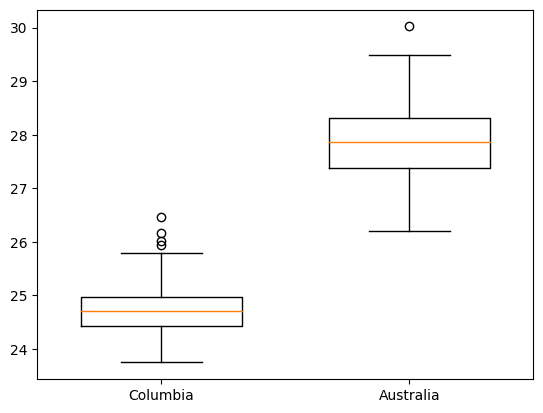

In [100]:
fig, axes = plt.subplots()
axes.boxplot([columbia, australia], labels = ["Columbia", "Australia"], widths = .65)
plt.show()

In [54]:
# Assumptions:

# 1) Our samples are simple random samples.
# 2) Two samples are independent from one another.
# 3) Both POPULATIONS are approximately normal. or the two samples are large enough.

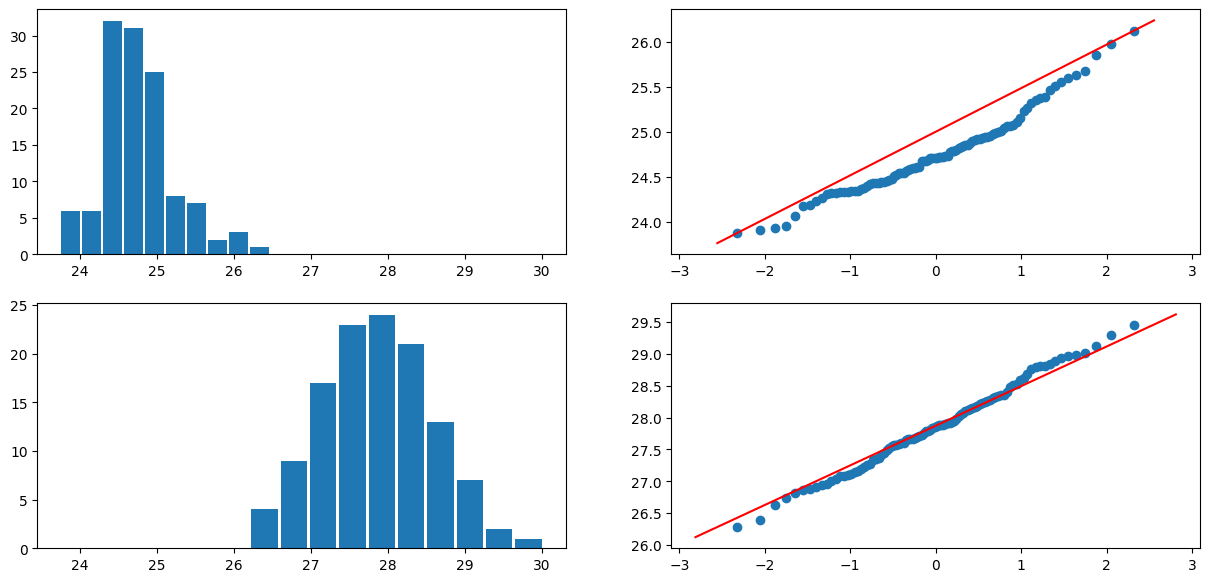

In [101]:
# Let's first visualize the data exploratively,

x = np.linspace(0, 1, num = 100)
qnorm = norm.ppf(x)

fig, ((axes_0, axes_1), (axes_2, axes_3)) = plt.subplots(nrows = 2, ncols = 2)
axes_0.sharex(axes_2)
axes_1.sharex(axes_3)
fig.set_size_inches(15, 7)

axes_0.hist(columbia, rwidth = 0.9, bins = 10)
axes_1.scatter(qnorm, np.quantile(q = x, a = columbia))
axes_1.plot(axes_1.get_xbound(), axes_1.get_ybound(), color = "red")

axes_2.hist(australia, rwidth = 0.9, bins = 10)
axes_3.scatter(qnorm, np.quantile(q = x, a = australia))
axes_3.plot(axes_3.get_xbound(), axes_3.get_ybound(), color = "red")

plt.show()

In [102]:
# Our samples are not LARGE but large enough.

columbia.size, australia.size

(121, 121)

In [103]:
# They form aoughly normal distributions, with Australia having a higher degree of normality in distribution of temperatures.
# This postulate is reinforced by the qq plots as well.

In [104]:
# Our best estimate is the difference in the means of the two samples,

temp_diff

3.0999999999999943

In [110]:
# Next, to calculate the test statistic, we need the standard error of the population, since we do not know the standard error of the populations, 
# We'll use the standard error of the samples!

stderr_aus = australia.std() / np.sqrt(australia.size)
stderr_col = columbia.std() / np.sqrt(columbia.size)

stderr_aus, stderr_col

(0.0647872863232248, 0.04378279895216276)

In [114]:
# Pooled approach is not suitable here since there's considerable variation between the variances of the two samples!

australia.var(), columbia.var()

(0.5078844887644287, 0.2319489515743461)

In [111]:
# Using the unpooled approach,

stderr_combined = stderr_aus + stderr_col
stderr_combined

0.10857008527538756

In [112]:
tstat = (temp_diff - 0) / stderr_combined
tstat

28.552984849711205

In [120]:
# What does this t statistic really tell us?

# It tells that the actual population difference is t times the combined standard errors greater than the hypothesized difference, i.e 0.

temp_diff, 0.0 + (tstat * stderr_combined) 

(3.0999999999999943, 3.0999999999999943)

In [ ]:
# Since our t value had no direction, i.e two tailed t test,

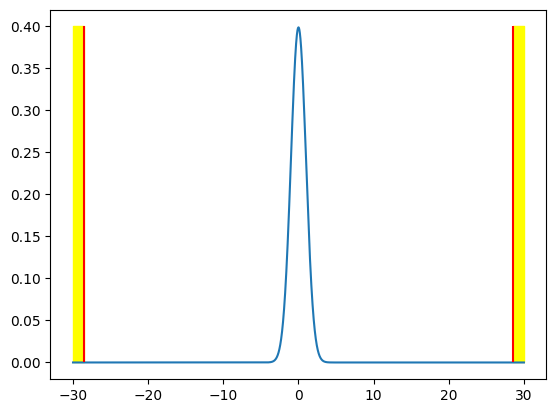

In [130]:
x = np.linspace(-30, 30, num = 10000)
tscores = t.pdf(x, df = x.size - 1)

fig, axes = plt.subplots()
axes.plot(x, tscores)
axes.vlines([-tstat, tstat], ymin = 0, ymax = 0.4, color = "red")
axes.fill_between(x = x, y1 = 0, y2 = 0.4, where = (x <= -tstat) | (x >= tstat), color = "yellow")
plt.show()

In [132]:
# The area of the curve enclosed by the line x = tstat, on the left.

t.cdf(tstat, df = columbia.size - 1)

1.0

In [133]:
# To get what's on the right, 

1 - t.cdf(tstat, df = columbia.size - 1)

0.0

In [135]:
# Twice that area,

p = 2 * (1 - t.cdf(tstat, df = columbia.size - 1))
p

0.0

In [ ]:
# p value is less than our alpha, significance!
# We can reject the Null hypothesis!.

# There is NOT ENOUGH EVIDENCE TO ACCEPT THE NULL!
# SO, IT GETS REJECTED!

# HOWEVER, WE SHOULD NOTE THAT WE DO NOT FIND EVIDENCE TO SUPPORT THE ALTERNATIVE HYPOTHESIS, BUT JUST TO REJECT THE NULL HYPOTHESIS.